In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Data = pd.read_csv('C:/Users/DELL/Downloads/ARIMA-And-Seasonal-ARIMA-master/ARIMA-And-Seasonal-ARIMA-master/perrin-freres-monthly.csv')

In [4]:
Data.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
Data.columns=['Month','Sales']

In [10]:
Data.drop(106,axis=0,inplace=True)

In [12]:
Data.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [13]:
Data.drop(105,axis=0,inplace=True)

In [17]:
Data['Month']=pd.to_datetime(Data['Month'])

In [18]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


In [19]:
Data.set_index('Month',inplace=True)

In [20]:
Data

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [21]:
Data.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<AxesSubplot:xlabel='Month'>

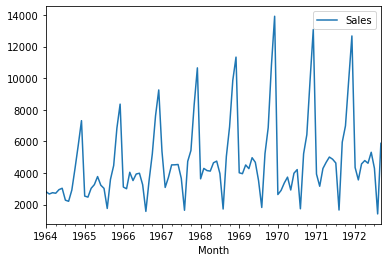

In [22]:
Data.plot()

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
Test_Result = adfuller(Data['Sales'])

In [36]:
def adfuller_test(sales):
    result=adfuller(sales)
    lables = ['ADF Test Statistic','P-Value','#Logs used','Number of observation used']
    for value,label in zip(result,lables):
        print(label+' : '+str(value))
    if result[1] <=0.05:
        print('strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary')
    else:
        print('weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary')

Diffrence

In [40]:
Data['Sales First diffrence'] = Data['Sales'] - Data['Sales'].shift(1)

In [42]:
Data['Seasonal First Diffrent'] = Data['Sales'] - Data['Sales'].shift(12)

In [43]:
Data

,Sales,Sales First diffrence,Seasonal First Diffrent
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
...,...,...,...
1972-05-01,4618.0,-170.0,-392.0
1972-06-01,5312.0,694.0,438.0
1972-07-01,4298.0,-1014.0,-335.0


In [44]:
adfuller_test(Data['Seasonal First Diffrent'].dropna())

ADF Test Statistic : -7.626619157213163
P-Value : 2.060579696813685e-11
#Logs used : 0
Number of observation used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

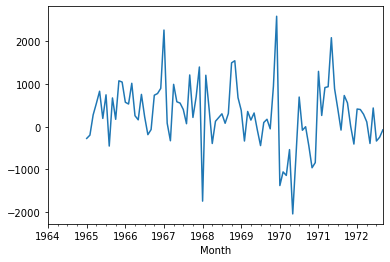

In [45]:
Data['Seasonal First Diffrent'].plot()

Auto Regressive Model

In [48]:
from pandas.plotting import autocorrelation_plot

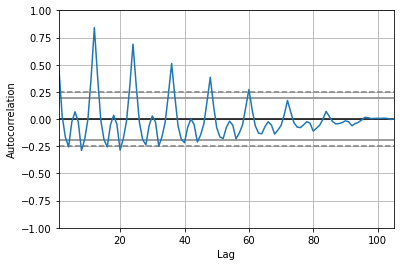

In [50]:
autocorrelation_plot(Data['Sales'])
plt.show()

In [60]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.graphics.tsaplots import plot_pacf,plot_pacf

In [59]:
import statsmodels.api

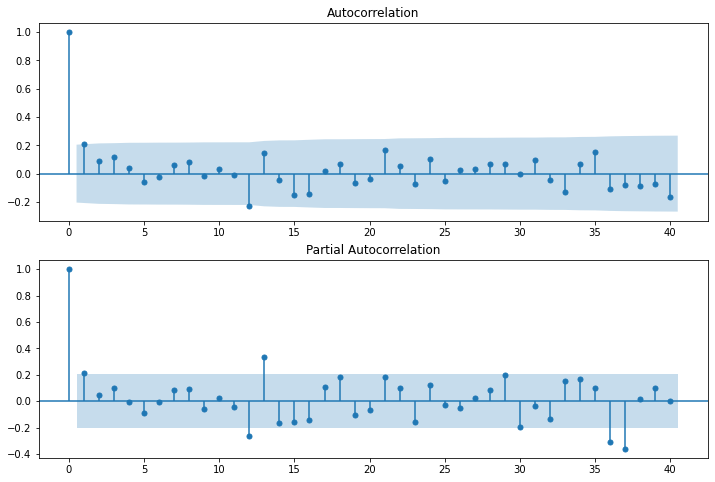

In [68]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = statsmodels.graphics.tsaplots.plot_acf(Data['Seasonal First Diffrent'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = statsmodels.graphics.tsaplots.plot_pacf(Data['Seasonal First Diffrent'].iloc[13:],lags=40,ax=ax2)

In [69]:
from statsmodels.graphics.tsaplots import plot_pacf

In [70]:
#for Non-seasonal data 
#p=1, d=1, q=0or1
from statsmodels.tsa.arima_model import ARIMA

In [71]:
Model = ARIMA(Data['Sales'],order=(1,1,1))

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will

In [72]:
Model_fit = Model.fit()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [73]:
Model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Tue, 17 Aug 2021   AIC                           1910.251
Time:                        13:47:47   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7853     12.405      1.837      0.066      -1.529      47.099
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [76]:
Data['Forcast'] = Model_fit.predict(start=90,end=103,dynamic=True)

<AxesSubplot:xlabel='Month'>

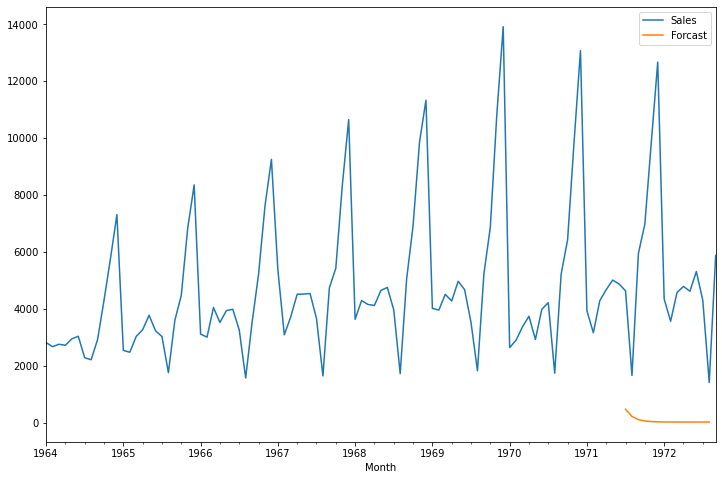

In [77]:
Data[['Sales','Forcast']].plot(figsize=(12,8))

In [78]:
import statsmodels.api as sm

In [79]:
model = sm.tsa.statespace.SARIMAX(Data['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
resultes = model.fit()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

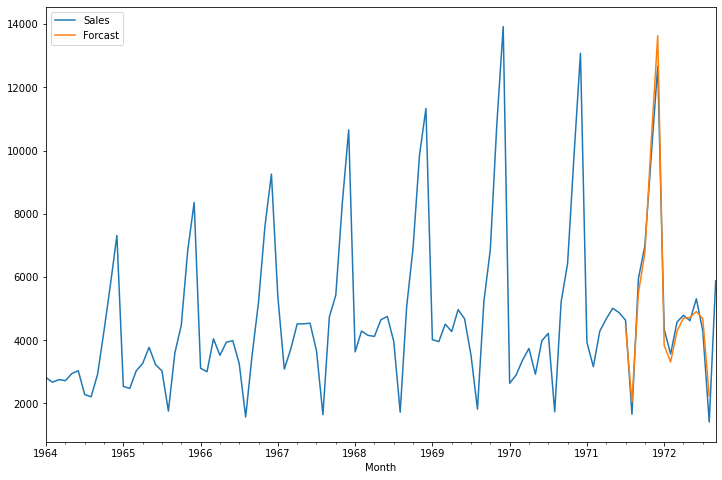

In [82]:
Data['Forcast'] = resultes.predict(start=90,end=103,dynamic=True)
Data[['Sales','Forcast']].plot(figsize=(12,8))

In [83]:
from pandas.tseries.offsets import DateOffset

In [84]:
feature_dates = [Data.index[-1] + DateOffset(months=x)for x in range(0,24)]

In [85]:
future_datest_Data=pd.DataFrame(index=feature_dates[1:],columns=Data.columns)

In [86]:
future_datest_Data

,Sales,Sales First diffrence,Seasonal First Diffrent,Forcast
1972-10-01,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN,NaN


In [87]:
future_Data=pd.concat([Data,future_datest_Data])

<AxesSubplot:>

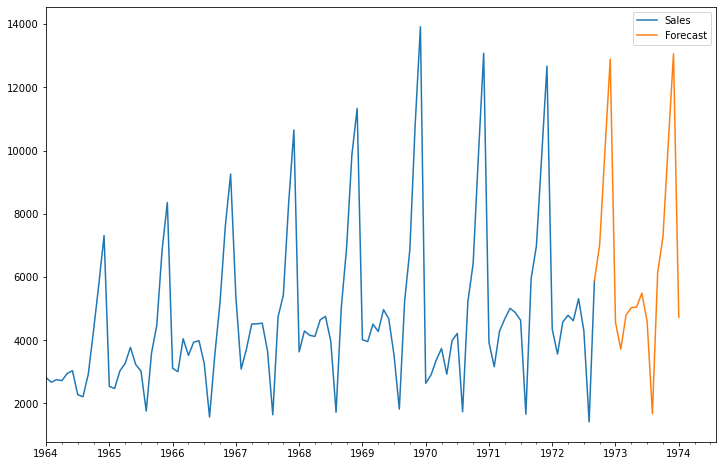

In [90]:
future_Data['Forecast'] = resultes.predict(start = 104, end = 120, dynamic= True)  
future_Data[['Sales', 'Forecast']].plot(figsize=(12, 8)) 